<img src="./logo_UTN.svg" align="right" width="150" />

#### Procesamiento Digital de Señales
# TS2: Algoritmo DFT
#### Eloy Silva

## Prototipo de la función
#### DFT(xx)

## Parámetros
#### xx: Vector de la señal a calcular la DFT

In [1]:
import numpy as np

def DFT(xx):
    N = len(xx)
    n = np.arange(N)
    XX = np.zeros(N, dtype=complex)
    
    for k in range(N):
        W = np.exp(-2j*np.pi*k*n / N)   #Twiddle factor
        XX[k] = np.dot(xx, W)           #Producto interno

    return  XX

## Programa de prueba

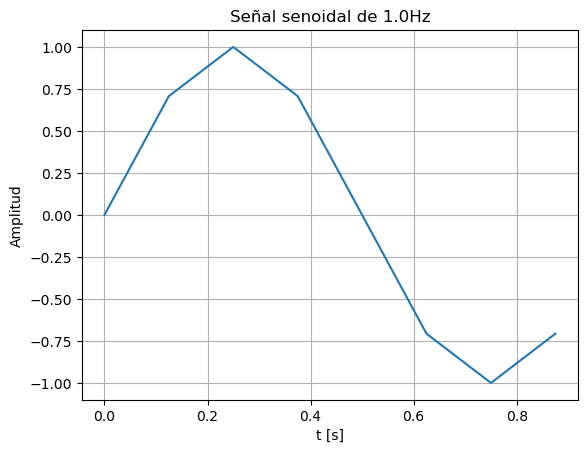

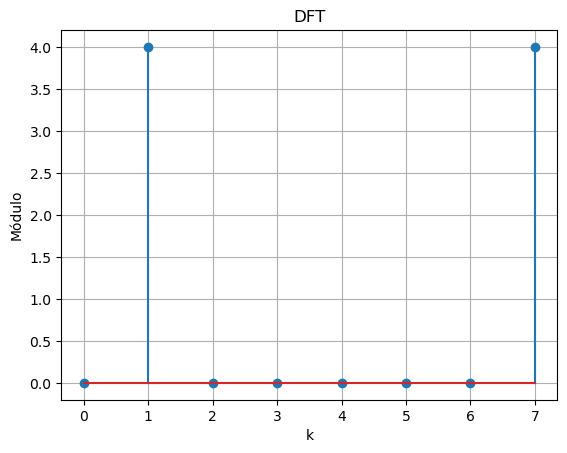

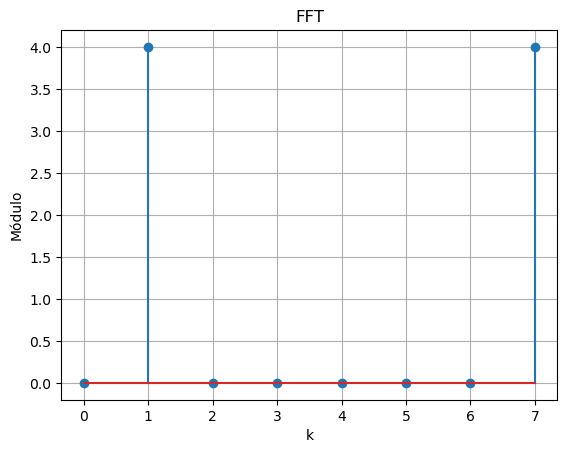

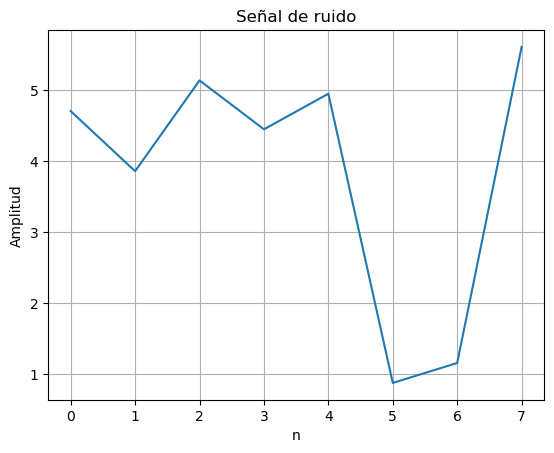

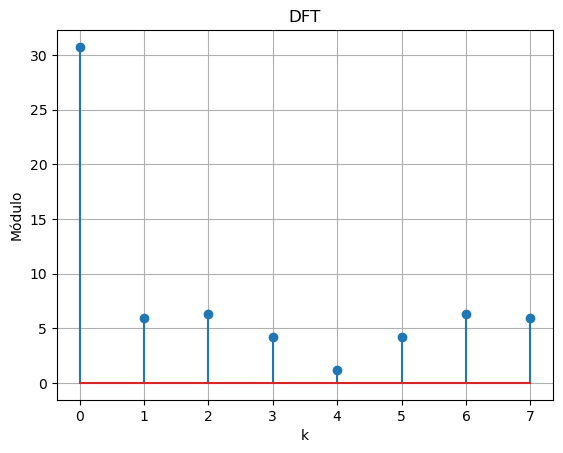

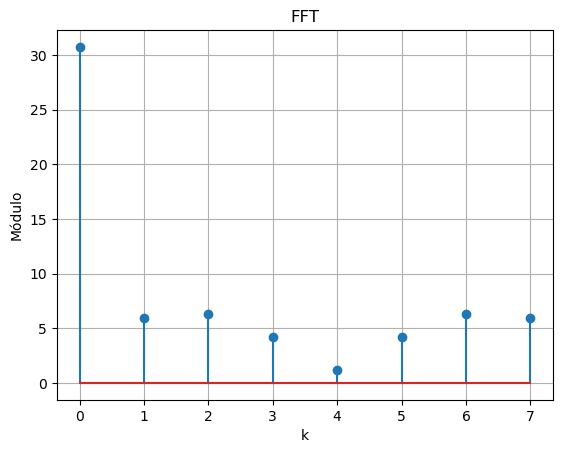

In [5]:
from ts1_generador import signal_generator
import matplotlib.pyplot as plt    

fs = 8          #Frecuencia de muestro
A = 1           #Amplitud de la señal
DC = 0          #Nivel de DC de la señal
k = 1           #Resolución espectral
N = 8           #Cantidad de muestras
f0 = k*fs/N     #Frecuencia de la señal
phi = 0         #Desfasaje en radianes
sig = 'sine'    #Tipo de señal

t, x = signal_generator(A, DC, f0, phi, N, fs, sig) #Llamada a la función generador

plt.plot(t, x)
plt.title('Señal senoidal de ' + str(f0) + 'Hz')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

XX = DFT(x)         #Calculo de DFT
n = np.arange(N)

plt.stem(n, np.abs(XX))
plt.title('DFT')
plt.xlabel('k')
plt.ylabel('Módulo')
plt.grid(True)
plt.show()

YY = np.fft.fft(x)  #Calculo de FFT para comparacion

plt.stem(n, np.abs(YY))
plt.title('FFT')
plt.xlabel('k')
plt.ylabel('Módulo')
plt.grid(True)
plt.show()

var = 4                 #Varianza de ruido uniforme
b_a = np.sqrt(var*12)
noise = b_a*np.random.random_sample(N)
n = np.arange(N)

plt.plot(n, noise)
plt.title('Señal de ruido')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

XX = DFT(noise)         #Calculo de DFT
n = np.arange(N)

plt.stem(n, np.abs(XX))
plt.title('DFT')
plt.xlabel('k')
plt.ylabel('Módulo')
plt.grid(True)
plt.show()

YY = np.fft.fft(noise)  #Calculo de FFT para comparacion

plt.stem(n, np.abs(YY))
plt.title('FFT')
plt.xlabel('k')
plt.ylabel('Módulo')
plt.grid(True)
plt.show()